In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.read_csv(r'E:\Krish Naik Data Science Bootcamp\Python\10_Linear_Regression\Algerian_forest_fires_dataset.csv')


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [4]:
df = pd.read_csv(r'E:\Krish Naik Data Science Bootcamp\Python\10_Linear_Regression\Algerian_forest_fires_dataset.csv')

### Understanding the Forest Fires Dataset
1. **Temperature** of day given in celcuis: Values ranges from (22 - 42)C
2. **Relative Humidity** - Amount of moisture content in air: Ranges from (21 - 90)%
3. **Wind Speed** - Speed of wind in km/h: Ranges from (6 - 29)km/h
4. **Rain** - Amount of rain in mm: Ranges from (0 - 16)mm
5. **Fine Fuel Moisture Code** - FFMC estimates the moisture content of fine surface fuels (like grass, leaves, twigs) and their readiness to ignite. Ranges from (28.6 -92.5).
- FMMC less than 75 ---> Moist ---> (low ignition chance)
- FMMC between 75 and 89 --->  Drying ---> (Moderate Fire Potential)
- FMMC greater than 90 ---> Very Dry ---> (High Ignition Probability)
6. **Duff Moisture Content** - estimates the moisture content of loosely compacted organic layers (called duff) located just below the surface litter layer — usually 5–10 cm deep. ranges from (1.1 to 65.9)
- Duff less than 20 ---> moist ---> (low ignition chance)
- Duff between 20 and 60 ---> Drying ---> (Moderate Fire Potential)
- Duff greater than 60 ---> Very dry ---> (High Ignition Probability)
7. **Drought Code** - It estimates the moisture content of deep, compact organic layers, typically 10–20 cm or more below the surface — like deep duff and decomposed soil. Ranges from (7 - 220.4)
- DC less than 150 ---> Moist ---> (Low ignition Chance)
- DC greater than 150 ---> Dryng ---> (Moderate Fire Potential)
8. **Initial Spread Index** - ISI estimates how quickly a wildfire could spread immediately after ignition, assuming fuels are available and dry enough. Ranges fron (0 - 18.5)
- ISI less than 2 ---> Very Slow spread(if any)
- ISI between 2 and 5 ---> Moderate Speed
- ISI between 5 and 10 ---> Fast spreading fire
- ISI greater than 10 ---> Very Rapid Spread 
9. **Build up index** - represents the total amount of fuel available to burn, based on the moisture content of the deeper organic layers. Ranges from (1.1 - 68)
- BUI less than 40 ---> Fuel availability is low
- BUI greater than 40 ---> Fuel availability is moderate
10. **Fire Weather Index** - estimates the potential fire intensity — how hard a fire would be to control if it ignites. Ranges from (0 - 31.1)
- FWI less than 5 ---> Low ---> Slow, controllable surface fires
- FWI between 5 and 12 ---> Moderate ---> Can challenge supression efforts
- FWI greater than 12 ---> High ---> Fast, intense, difficault to control
11. **Classes** - If there was a fire or not



## Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [7]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [6]:
## Check for missing values

df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [8]:
# Create Regions for the 2 datasets

df.loc[:122, "Region"] = 0
df.loc[122:, "Region"] = 1

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       247 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.1+ KB


In [10]:
df[['Region']] = df[['Region']].astype(int)

In [12]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1
246,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1


In [13]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
Region         0
dtype: int64

In [ ]:
## Remove the null values
df.head()

In [14]:
df = df.dropna().reset_index(drop=True)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [15]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [16]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [17]:
df = df.drop(122).reset_index(drop=True)

In [18]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [19]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [20]:
## Fixing Spaces in column names

df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [ ]:
df.info()

In [21]:
## Set Appropriate Datatypes

df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


In [25]:
## Changin the other columns to float data types

objects = [features for features in df.columns if df[features].dtype == 'O'] 

In [26]:
for i in objects:
    if i!= 'Classes':
        df[i] = df[i].astype(float)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


### Exploratory Data Analysis

In [82]:
df_copy = df.drop(['day', 'month', 'year'], axis = 1)

In [83]:
df_copy

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [84]:
## Encoding of the categories in classes
df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'), 'not fire','fire')

In [85]:
df_copy['Classes'].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

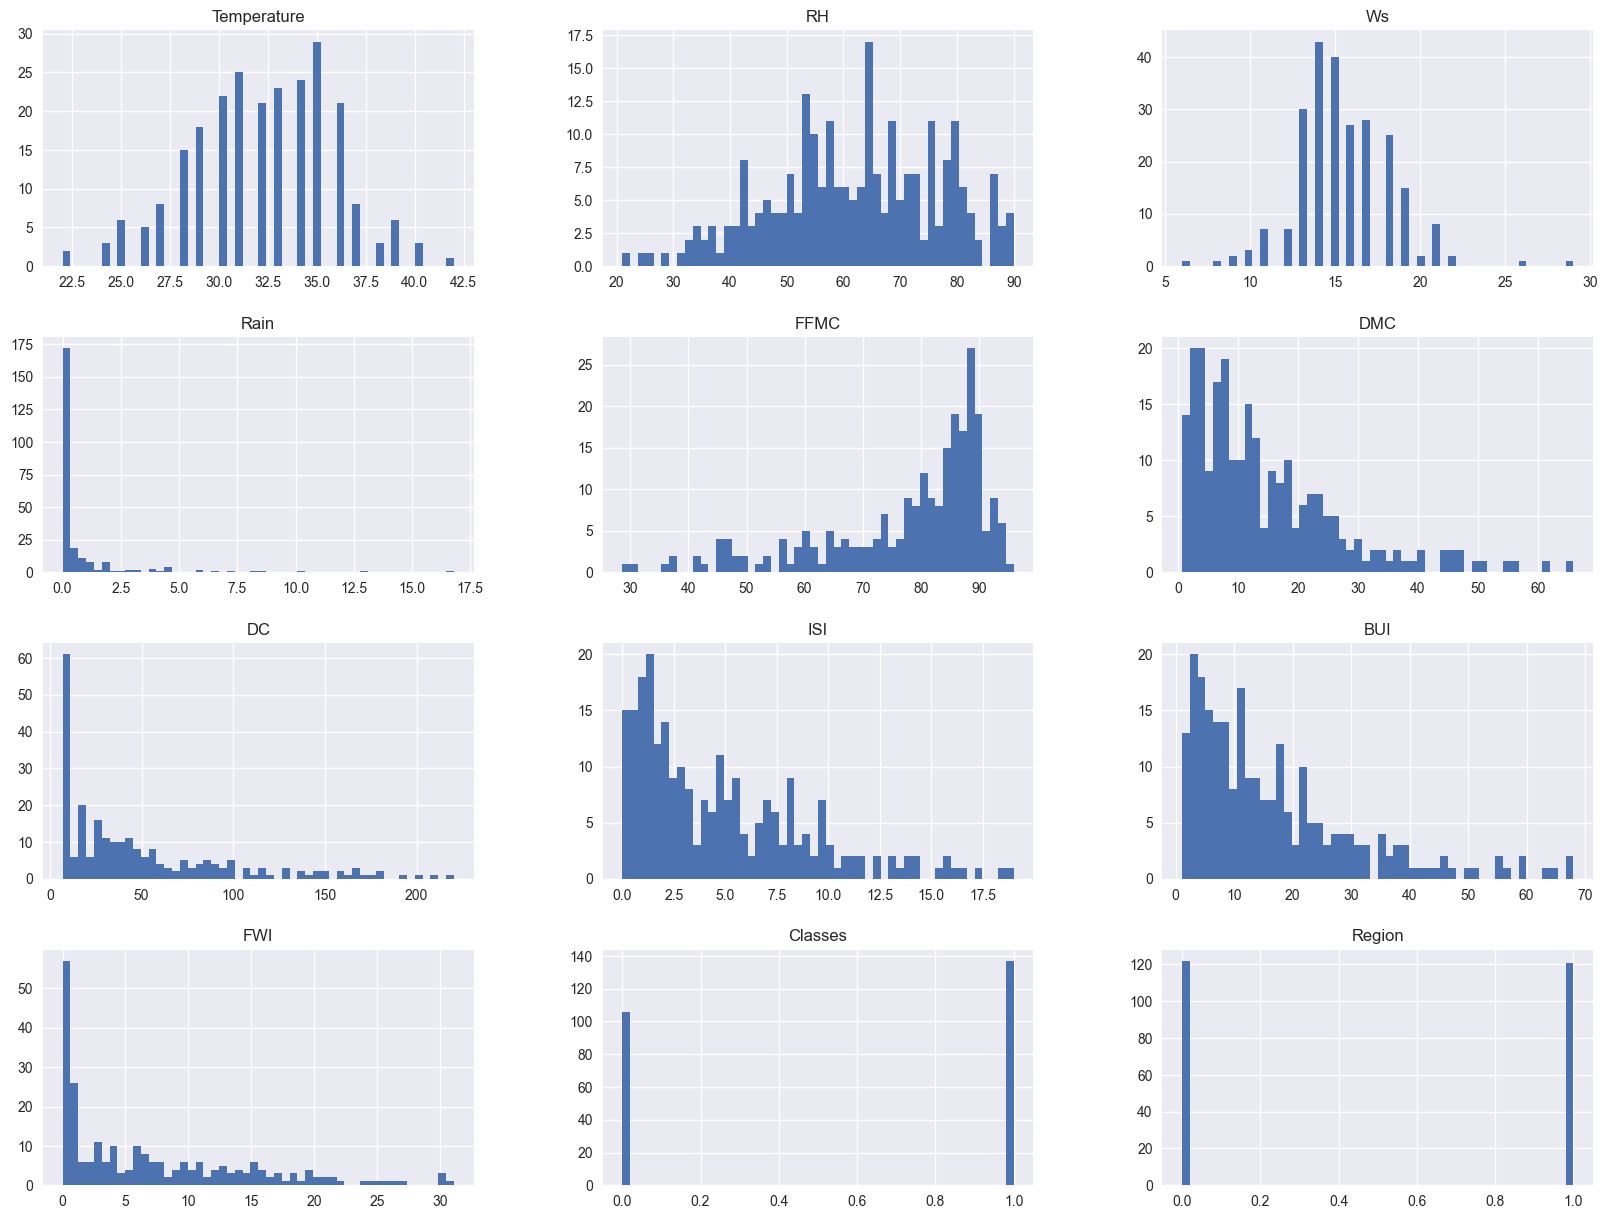

In [61]:
## Plot density plot for all features

plt.style.use('seaborn-v0_8')
df_copy.hist(bins = 50, figsize=(20, 15))
plt.show()

In [63]:
## Percentages of fire in pie chart
percentage = df_copy['Classes'].value_counts(normalize = True)*100

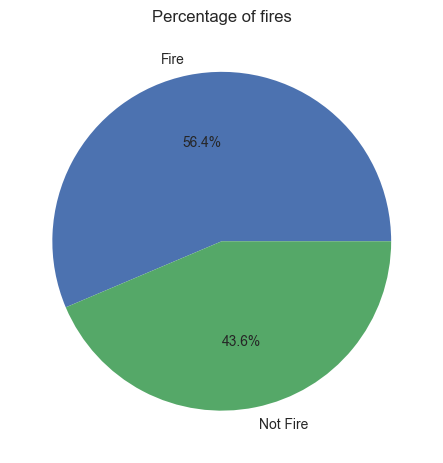

In [64]:
### Plot pie chart
classlabels = ["Fire", "Not Fire"]
plt.Figure(figsize=(12, 7))
plt.pie(percentage, labels=classlabels, autopct='%1.1f%%')
plt.title("Percentage of fires")
plt.show()

In [65]:
## Correlation
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

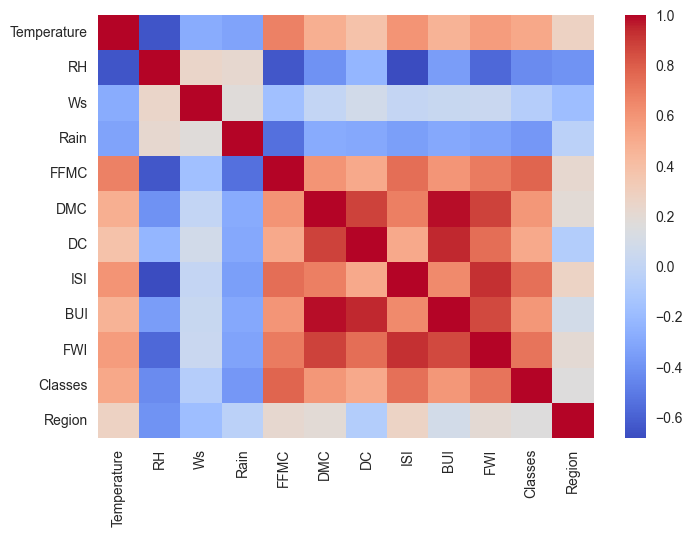

In [70]:
sns.heatmap(df_copy.corr(), cmap = 'coolwarm')

<Axes: ylabel='FWI'>

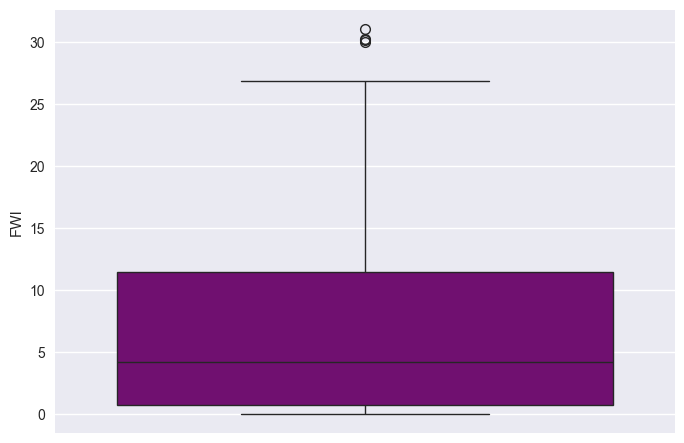

In [72]:
## Box Plots
sns.boxplot(df_copy['FWI'], color = 'purple')

In [81]:
df_copy['Classes'].value_counts()

Classes
fire    243
Name: count, dtype: int64

In [87]:
## Encoding of the categories in classes
df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 'not fire','fire')

Text(0, 0.5, 'number of fires')

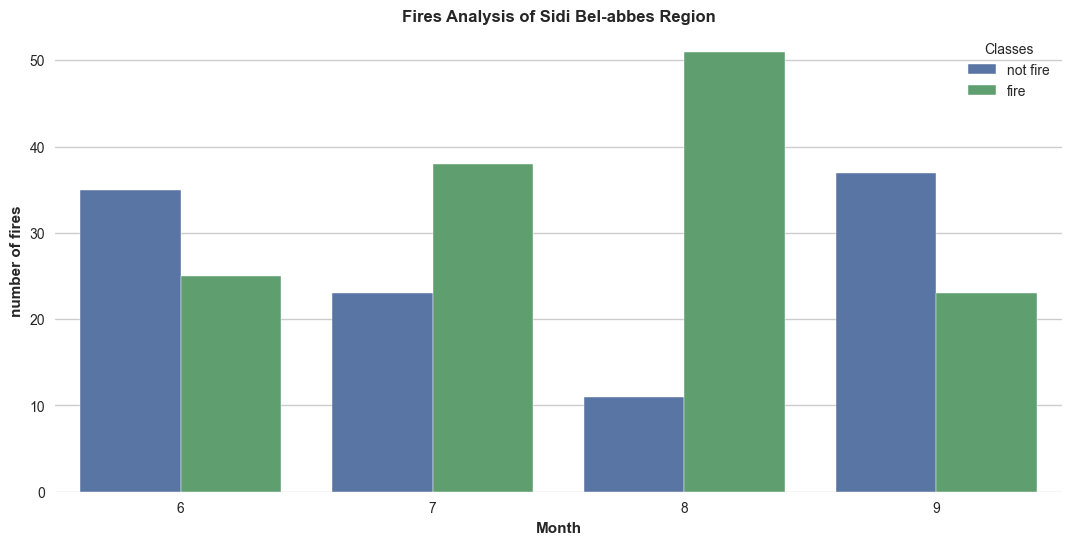

In [91]:
## Monthly Fire Analysis
dftemp = df_copy.loc[df['Region']==1]
plt.subplots(figsize = (13, 6))
sns.set_style('whitegrid')
sns.countplot(x = 'month', hue='Classes', data=df)
plt.xlabel("Month", weight = "bold")
plt.title("Fires Analysis of Sidi Bel-abbes Region", weight = "bold")
plt.ylabel("number of fires", weight = "bold")

Text(0, 0.5, 'number of fires')

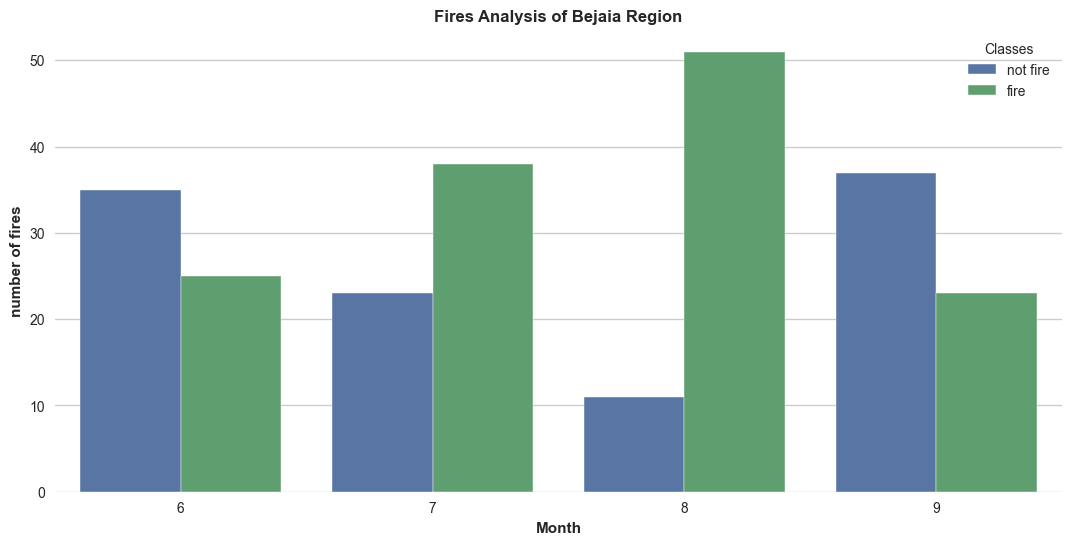

In [92]:
## Monthly Fire Analysis
dftemp = df_copy.loc[df['Region']==0]
plt.subplots(figsize = (13, 6))
sns.set_style('whitegrid')
sns.countplot(x = 'month', hue='Classes', data=df)
plt.xlabel("Month", weight = "bold")
plt.title("Fires Analysis of Bejaia Region", weight = "bold")
plt.ylabel("number of fires", weight = "bold")